In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import math
df = pd.read_csv('C:/Users/Dell/Desktop/PatientSatisfaction.csv')

In [3]:
df.head()

,OBS,SATISFAC,AGE,SEVERITY,ANXIETY
0,1,48,50,51,2.3
1,2,57,36,46,2.3
2,3,66,40,48,2.2
3,4,70,41,44,1.8
4,5,89,28,43,1.8


In [107]:
x=df[['SATISFAC','AGE','SEVERITY','ANXIETY']] #correlation_matrix
y=df['SATISFAC']
corr = x.corr()
corr

,SATISFAC,AGE,SEVERITY,ANXIETY
SATISFAC,1.000000,-0.773683,-0.587444,-0.602310
AGE,-0.773683,1.000000,0.466609,0.497695
SEVERITY,-0.587444,0.466609,1.000000,0.794527
ANXIETY,-0.602310,0.497695,0.794527,1.000000


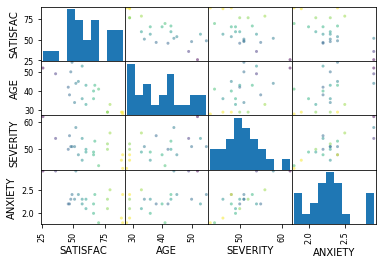

In [108]:
scatter = pd.plotting.scatter_matrix(x, c=y) #scatterplot_matrix

In [15]:
linreg = LinearRegression(fit_intercept=False).fit(df[['AGE','ANXIETY','SEVERITY']],df.SATISFAC) #fit_intercept=False
linreg

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [16]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(df[['AGE','ANXIETY','SEVERITY']],df.SATISFAC)))

linear model coeff (w): [ -1.23525259 -24.45986063   3.25500059]
linear model intercept (b): 0.000
R-squared score (training): -0.015


In [17]:
linreg = LinearRegression().fit(df[['AGE','ANXIETY','SEVERITY']],df.SATISFAC) #fit_intercept=True
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(df[['AGE','ANXIETY','SEVERITY']],df.SATISFAC)))

linear model coeff (w): [-1.21031816 -8.61303151 -0.66590562]
linear model intercept (b): 162.876
R-squared score (training): 0.673


In [19]:
y_fitted = linreg.coef_[0]*df.AGE+linreg.coef_[1]*df.ANXIETY+linreg.coef_[2]*df.SEVERITY+linreg.intercept_ #fitted_values
y_fitted

0     48.588832
1     68.862814
2     63.551033
3     68.449550
4     84.849592
5     42.633614
6     59.798586
7     55.776836
8     33.675415
9     76.394025
10    75.141927
11    54.867944
12    61.310330
13    67.953922
14    43.821463
15    69.449007
16    64.112106
17    80.780254
18    72.218658
19    41.675938
20    73.339607
21    46.021582
22    57.726964
dtype: float64

In [20]:
resid=abs(y_fitted-df.SATISFAC) #residuals
resid

0      0.588832
1     11.862814
2      2.448967
3      1.550450
4      4.150408
5      6.633614
6     13.798586
7      1.776836
8      7.675415
9      0.605975
10    13.858073
11    12.132056
12    14.310330
13    16.953922
14    13.178537
15     3.449007
16    14.887894
17     7.219746
18    12.218658
19     7.324062
20     3.660393
21     5.978418
22     2.273036
dtype: float64

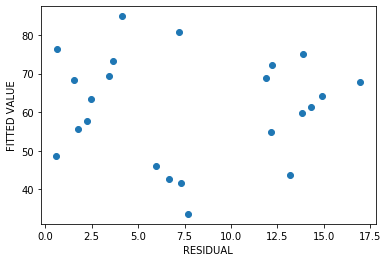

In [68]:
%matplotlib inline  
plt.xlabel('RESIDUAL') #plotting_residual_vs_fitted_values
plt.ylabel('FITTED VALUE')
plt.scatter(resid,y_fitted)

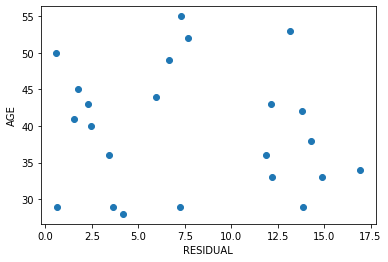

In [109]:
%matplotlib inline  
plt.xlabel('RESIDUAL') #plotting_residual_vs_AGE
plt.ylabel('AGE')
plt.scatter(resid,df.AGE)

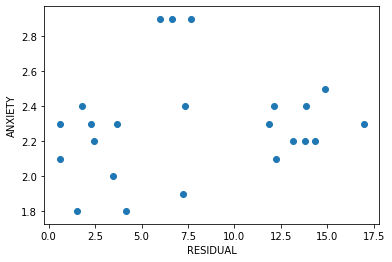

In [110]:
%matplotlib inline  
plt.xlabel('RESIDUAL') #plotting_residual_vs_ANXIETY
plt.ylabel('ANXIETY')
plt.scatter(resid,df.ANXIETY)

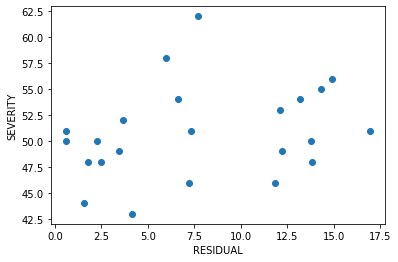

In [111]:
%matplotlib inline  
plt.xlabel('RESIDUAL') #plotting_residual_vs_SEVERITY
plt.ylabel('SEVERITY')
plt.scatter(resid,df.SEVERITY)

In [13]:
a = df.AGE*df.ANXIETY
b = df.AGE*df.SEVERITY
c = df.AGE*df.SATISFAC
d = df.SATISFAC*df.ANXIETY
e = df.SATISFAC*df.SEVERITY
f = df.ANXIETY*df.SEVERITY

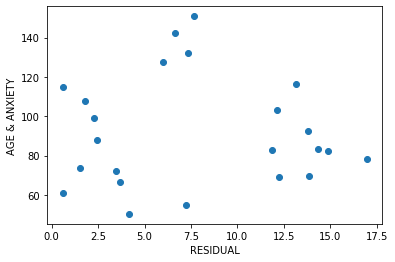

In [14]:
plt.xlabel('RESIDUAL') #plotting_residual_vs_Two_factor_interaction
plt.ylabel('AGE & ANXIETY')
plt.scatter(resid,a)

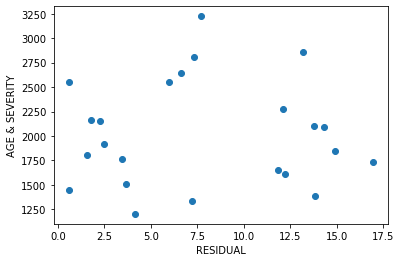

In [15]:
plt.xlabel('RESIDUAL') #plotting_residual_vs_Two_factor_interaction
plt.ylabel('AGE & SEVERITY')
plt.scatter(resid,b)

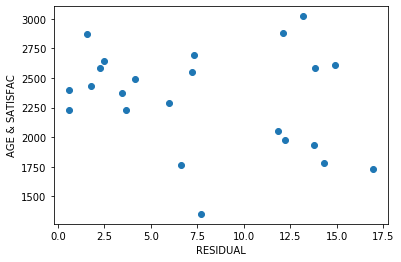

In [16]:
plt.xlabel('RESIDUAL') #plotting_residual_vs_Two_factor_interaction
plt.ylabel('AGE & SATISFAC')
plt.scatter(resid,c)

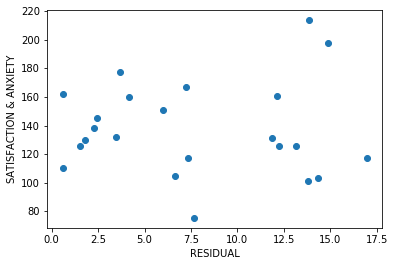

In [17]:
plt.xlabel('RESIDUAL') #plotting_residual_vs_Two_factor_interaction
plt.ylabel('SATISFACTION & ANXIETY')
plt.scatter(resid,d)

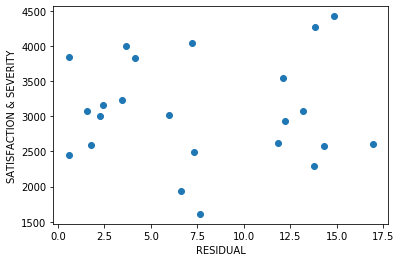

In [18]:
plt.xlabel('RESIDUAL') #plotting_residual_vs_Two_factor_interaction
plt.ylabel('SATISFACTION & SEVERITY')
plt.scatter(resid,e)

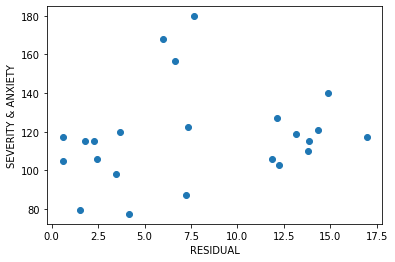

In [19]:
plt.xlabel('RESIDUAL') #plotting_residual_vs_Two_factor_interaction
plt.ylabel('SEVERITY & ANXIETY')
plt.scatter(resid,f)

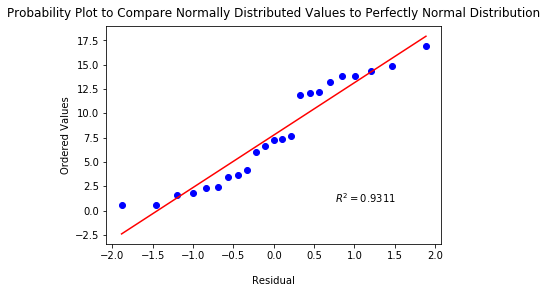

In [22]:
stats.probplot(resid, dist="norm", fit=True, rvalue=True, plot=plt) #Normal_Probability_plot_SATISFACTION
plt.xlabel("Residual", labelpad=15)
plt.title("Probability Plot to Compare Normally Distributed Values to Perfectly Normal Distribution", y=1.015)
plt.show()

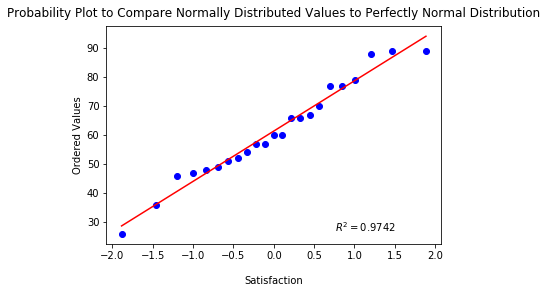

In [115]:
stats.probplot(df.SATISFAC, dist="norm", fit=True, rvalue=True, plot=plt) #Normal_Probability_plot_SATISFACTION
plt.xlabel("Satisfaction", labelpad=15)
plt.title("Probability Plot to Compare Normally Distributed Values to Perfectly Normal Distribution", y=1.015)
plt.show()

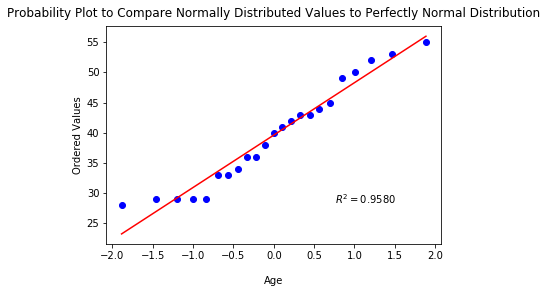

In [40]:
stats.probplot(df.AGE, dist="norm", fit=True, rvalue=True, plot=plt) #Normal_Probability_plot_AGE
plt.xlabel("Age", labelpad=15)
plt.title("Probability Plot to Compare Normally Distributed Values to Perfectly Normal Distribution", y=1.015)
plt.show()

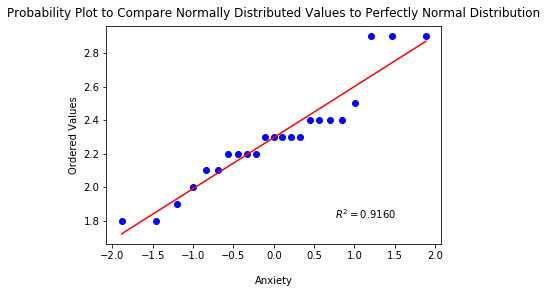

In [41]:
stats.probplot(df.ANXIETY, dist="norm", fit=True, rvalue=True, plot=plt) #Normal_Probability_plot_ANXIETY
plt.xlabel("Anxiety", labelpad=15)
plt.title("Probability Plot to Compare Normally Distributed Values to Perfectly Normal Distribution", y=1.015)
plt.show()

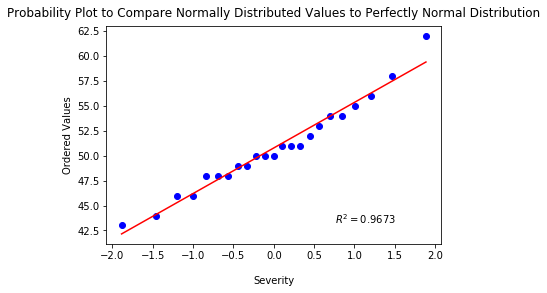

In [42]:
stats.probplot(df.SEVERITY, dist="norm", fit=True, rvalue=True, plot=plt) #Normal_Probability_plot_SEVERITY
plt.xlabel("Severity", labelpad=15)
plt.title("Probability Plot to Compare Normally Distributed Values to Perfectly Normal Distribution", y=1.015)
plt.show()

In [7]:
X_dataset=df[['AGE','ANXIETY','SEVERITY']]
y_dataset=df[['SATISFAC']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values

In [8]:
import statsmodels.api as sm

X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           7.48e-05
Time:                        18:56:38   Log-Likelihood:                -84.054
No. Observations:                  23   AIC:                             176.1
Df Residuals:                      19   BIC:                             180.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.8759     25.776      6.319      0.000     108.927     216.825
x1            -1.2103      0.301     -4.015      0.001      -1.841      -0.579
x2            -8.6130     12.241     -0.704      0.490     -34.234      17.008
x3            -0.6659      0.821     -0.811      0.427      -2.384       1.052
==============================================================================
Omnibus:                        1.718   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.075
Skew:                          -0.188   Prob(JB):                        0.584
Kurtosis:                       2.010   Cond. No.                         784.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X_dataset=df[['AGE']]
y_dataset=df[['SATISFAC']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     31.31
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.49e-05
Time:                        23:06:02   Log-Likelihood:                -86.400
No. Observations:                  23   AIC:                             176.8
Df Residuals:                      21   BIC:                             179.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.8318     11.042     11.033      0.000      98.868     144.795
x1            -1.5270      0.273     -5.596      0.000      -2.095      -0.960
==============================================================================
Omnibus:                        3.442   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                1.709
Skew:                          -0.352   Prob(JB):                        0.426
Kurtosis:                       1.866   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
Q = 121.8318+2*11.042 #Confidence_interval_for_AGE_Beta0
W = 121.8318-2*11.042
W,Q

(99.7478, 143.9158)

In [44]:
Q = -1.5270+2*0.273 #Confidence_interval_for_AGE_Beta1
W = -1.5270-2*0.273
W,Q

(-2.073, -0.9809999999999999)

In [40]:
X_dataset=df[['SEVERITY']]
y_dataset=df[['SATISFAC']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     11.07
Date:                Sat, 28 Sep 2019   Prob (F-statistic):            0.00321
Time:                        23:07:09   Log-Likelihood:                -92.029
No. Observations:                  23   AIC:                             188.1
Df Residuals:                      21   BIC:                             190.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.6140     33.872      5.126      0.000     103.173     244.056
x1            -2.2107      0.665     -3.326      0.003      -3.593      -0.829
==============================================================================
Omnibus:                        2.037   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.643
Skew:                           0.510   Prob(JB):                        0.440
Kurtosis:                       2.178   Cond. No.                         598.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
Q = -2.2107+2*0.665 #Confidence_interval_for_SEVERITY_Beta_1
W = -2.2107-2*0.665
W,Q

(-3.5407, -0.8807)

In [46]:
Q = 173.614+2*33.872 #Confidence_interval_for_SEVERITY_Beta_0
W = 173.614-2*33.872
W,Q

(105.87, 241.358)

In [41]:
X_dataset=df[['ANXIETY']]
y_dataset=df[['SATISFAC']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     11.96
Date:                Sat, 28 Sep 2019   Prob (F-statistic):            0.00236
Time:                        23:07:26   Log-Likelihood:                -91.715
No. Observations:                  23   AIC:                             187.4
Df Residuals:                      21   BIC:                             189.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.4319     22.188      6.194      0.000      91.290     183.574
x1           -33.1427      9.585     -3.458      0.002     -53.076     -13.209
==============================================================================
Omnibus:                        2.280   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.832
Skew:                           0.667   Prob(JB):                        0.400
Kurtosis:                       2.637   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
Q = -33.1427+2*9.585 #Confidence_interval_for_ANXIETY_Beta1
W = -33.1427-2*9.585
W,Q

(-52.3127, -13.972699999999996)

In [48]:
Q = 137.4319+2*22.188 #Confidence_interval_for_ANXIETY_Beta0
W = 137.4319-2*22.188
W,Q

(93.05590000000001, 181.80790000000002)

In [151]:
X = df.AGE #Transformations
Y = X*X
Y

0     2500
1     1296
2     1600
3     1681
4      784
5     2401
6     1764
7     2025
8     2704
9      841
10     841
11    1849
12    1444
13    1156
14    2809
15    1296
16    1089
17     841
18    1089
19    3025
20     841
21    1936
22    1849
Name: AGE, dtype: int64

In [150]:
Z = np.sqrt(X)
Z

0     7.071068
1     6.000000
2     6.324555
3     6.403124
4     5.291503
5     7.000000
6     6.480741
7     6.708204
8     7.211103
9     5.385165
10    5.385165
11    6.557439
12    6.164414
13    5.830952
14    7.280110
15    6.000000
16    5.744563
17    5.385165
18    5.744563
19    7.416198
20    5.385165
21    6.633250
22    6.557439
Name: AGE, dtype: float64

In [144]:
C = np.log(Z)
C

0     1.956012
1     1.791759
2     1.844440
3     1.856786
4     1.666102
5     1.945910
6     1.868835
7     1.903331
8     1.975622
9     1.683648
10    1.683648
11    1.880600
12    1.818793
13    1.763180
14    1.985146
15    1.791759
16    1.748254
17    1.683648
18    1.748254
19    2.003667
20    1.683648
21    1.892095
22    1.880600
Name: AGE, dtype: float64

In [131]:
A = df.ANXIETY
B = A*A
B

0     5.29
1     5.29
2     4.84
3     3.24
4     3.24
5     8.41
6     4.84
7     5.76
8     8.41
9     4.41
10    5.76
11    5.76
12    4.84
13    5.29
14    4.84
15    4.00
16    6.25
17    3.61
18    4.41
19    5.76
20    5.29
21    8.41
22    5.29
Name: ANXIETY, dtype: float64

In [132]:
D = np.sqrt(A)
D

0     1.516575
1     1.516575
2     1.483240
3     1.341641
4     1.341641
5     1.702939
6     1.483240
7     1.549193
8     1.702939
9     1.449138
10    1.549193
11    1.549193
12    1.483240
13    1.516575
14    1.483240
15    1.414214
16    1.581139
17    1.378405
18    1.449138
19    1.549193
20    1.516575
21    1.702939
22    1.516575
Name: ANXIETY, dtype: float64

In [133]:
E = np.log(D)
E

0     0.416455
1     0.416455
2     0.394229
3     0.293893
4     0.293893
5     0.532355
6     0.394229
7     0.437734
8     0.532355
9     0.370969
10    0.437734
11    0.437734
12    0.394229
13    0.416455
14    0.394229
15    0.346574
16    0.458145
17    0.320927
18    0.370969
19    0.437734
20    0.416455
21    0.532355
22    0.416455
Name: ANXIETY, dtype: float64

In [134]:
F = df.ANXIETY
G = F**2
G

0     5.29
1     5.29
2     4.84
3     3.24
4     3.24
5     8.41
6     4.84
7     5.76
8     8.41
9     4.41
10    5.76
11    5.76
12    4.84
13    5.29
14    4.84
15    4.00
16    6.25
17    3.61
18    4.41
19    5.76
20    5.29
21    8.41
22    5.29
Name: ANXIETY, dtype: float64

In [135]:
G = np.sqrt(F)
G

0     1.516575
1     1.516575
2     1.483240
3     1.341641
4     1.341641
5     1.702939
6     1.483240
7     1.549193
8     1.702939
9     1.449138
10    1.549193
11    1.549193
12    1.483240
13    1.516575
14    1.483240
15    1.414214
16    1.581139
17    1.378405
18    1.449138
19    1.549193
20    1.516575
21    1.702939
22    1.516575
Name: ANXIETY, dtype: float64

In [136]:
H = np.log(G)
H

0     0.416455
1     0.416455
2     0.394229
3     0.293893
4     0.293893
5     0.532355
6     0.394229
7     0.437734
8     0.532355
9     0.370969
10    0.437734
11    0.437734
12    0.394229
13    0.416455
14    0.394229
15    0.346574
16    0.458145
17    0.320927
18    0.370969
19    0.437734
20    0.416455
21    0.532355
22    0.416455
Name: ANXIETY, dtype: float64

In [137]:
I = df.SEVERITY
J = I**2
J

0     2601
1     2116
2     2304
3     1936
4     1849
5     2916
6     2500
7     2304
8     3844
9     2500
10    2304
11    2809
12    3025
13    2601
14    2916
15    2401
16    3136
17    2116
18    2401
19    2601
20    2704
21    3364
22    2500
Name: SEVERITY, dtype: int64

In [138]:
K = np.sqrt(I)
K

0     7.141428
1     6.782330
2     6.928203
3     6.633250
4     6.557439
5     7.348469
6     7.071068
7     6.928203
8     7.874008
9     7.071068
10    6.928203
11    7.280110
12    7.416198
13    7.141428
14    7.348469
15    7.000000
16    7.483315
17    6.782330
18    7.000000
19    7.141428
20    7.211103
21    7.615773
22    7.071068
Name: SEVERITY, dtype: float64

In [139]:
L = np.log(K)
L

0     1.965913
1     1.914321
2     1.935601
3     1.892095
4     1.880600
5     1.994492
6     1.956012
7     1.935601
8     2.063567
9     1.956012
10    1.935601
11    1.985146
12    2.003667
13    1.965913
14    1.994492
15    1.945910
16    2.012676
17    1.914321
18    1.945910
19    1.965913
20    1.975622
21    2.030222
22    1.956012
Name: SEVERITY, dtype: float64

In [49]:
from sklearn.preprocessing import PolynomialFeatures  #Fitting_Linear_Regression_degree=3
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df[['AGE','ANXIETY','SEVERITY']])

In [10]:
linreg = LinearRegression().fit(X_F1_poly, df.SATISFAC)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_F1_poly, df.SATISFAC)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  1.67859354e+03 -4.45591708e+04 -2.72909917e+02
 -1.92430961e+01  9.00725469e+02 -7.63483157e+01 -4.72485452e+02
  1.08061158e+03  1.05271119e+01  3.35470272e-04  2.03359829e+00
  2.83506236e-01 -3.89656740e+02  1.43278769e+01  2.04205272e-01
  5.33723460e+03 -4.02698739e+02  1.78466603e+00 -1.44435085e-01]
(poly deg 3) linear model intercept (b): 16882.573
(poly deg 3) R-squared score (training): 0.992


In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df[['AGE']])
linreg = LinearRegression().fit(X_F1_poly, df.SATISFAC)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_F1_poly, df.SATISFAC)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -2.60234331e+01  5.55406197e-01 -4.06029057e-03]
(poly deg 3) linear model intercept (b): 468.595
(poly deg 3) R-squared score (training): 0.655


In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df[['ANXIETY']])

In [99]:
linreg = LinearRegression().fit(X_F1_poly, df.SATISFAC)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_F1_poly, df.SATISFAC)))

(poly deg 3) linear model coeff (w):
[    0.         -3543.06994937  1518.86746996  -215.6659505 ]
(poly deg 3) linear model intercept (b): 2799.787
(poly deg 3) R-squared score (training): 0.469


In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df[['SEVERITY']])

In [34]:
linreg = LinearRegression().fit(X_F1_poly, df.SATISFAC)

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 3) R-squared score (training): {:.3f}'
     .format(linreg.score(X_F1_poly, df.SATISFAC)))

(poly deg 3) linear model coeff (w):
[ 0.00000000e+00 -2.17684004e+02  4.14862867e+00 -2.64360897e-02]
(poly deg 3) linear model intercept (b): 3878.111
(poly deg 3) R-squared score (training): 0.398


In [37]:
X_dataset=df[['AGE','ANXIETY','SEVERITY']]
y_dataset=df[['SATISFAC']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df[['AGE','ANXIETY','SEVERITY']])
X_with_const=sm.add_constant(X_F1_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     18.50
Date:                Sat, 28 Sep 2019   Prob (F-statistic):             0.0171
Time:                        21:38:43   Log-Likelihood:                -42.017
No. Observations:                  23   AIC:                             124.0
Df Residuals:                       3   BIC:                             146.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.688e+04   5027.476      3.358      0.044     882.899    3.29e+04
x1          1678.5935    387.548      4.331      0.023     445.241    2911.946
x2         -4.456e+04   8197.212     -5.436      0.012   -7.06e+04   -1.85e+04
x3          -272.9099    330.603     -0.825      0.470   -1325.035     779.215
x4           -19.2431      3.825     -5.031      0.015     -31.416      -7.070
x5           900.7255    209.868      4.292      0.023     232.833    1568.618
x6           -76.3483     18.871     -4.046      0.027    -136.405     -16.291
x7          -472.4854   1118.140     -0.423      0.701   -4030.907    3085.936
x8          1080.6116    240.400      4.495      0.021     315.551    1845.672
x9            10.5271     10.072      1.045      0.373     -21.525      42.580
x10            0.0003      0.005      0.069      0.950      -0.015       0.016
x11            2.0336      0.683      2.979      0.059      -0.139       4.206
x12            0.2835      0.049      5.778      0.010       0.127       0.440
x13         -389.6567     85.265     -4.570      0.020    -661.007    -118.306
x14           14.3279      2.881      4.974      0.016       5.160      23.496
x15            0.2042      0.112      1.823      0.166      -0.152       0.561
x16         5337.2346   1674.573      3.187      0.050       7.997    1.07e+04
x17         -402.6987    152.622     -2.639      0.078    -888.411      83.013
x18            1.7847      5.157      0.346      0.752     -14.626      18.195
x19           -0.1444      0.157     -0.920      0.425      -0.644       0.355
==============================================================================
Omnibus:                        2.067   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                0.723
Skew:                          -0.222   Prob(JB):                        0.697
Kurtosis:                       3.746   Cond. No.                     2.25e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_dataset=df[['AGE']]
y_dataset=df[['SATISFAC']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
import statsmodels.api as sm
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(df[['AGE']])
X_with_const=sm.add_constant(X_F1_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     12.03
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           0.000122
Time:                        21:52:33   Log-Likelihood:                -84.656
No. Observations:                  23   AIC:                             177.3
Df Residuals:                      19   BIC:                             181.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.5953    351.482      1.333      0.198    -267.066    1204.256
x1           -26.0234     26.907     -0.967      0.346     -82.341      30.294
x2             0.5554      0.670      0.829      0.417      -0.847       1.957
x3            -0.0041      0.005     -0.747      0.464      -0.015       0.007
==============================================================================
Omnibus:                        1.634   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.242
Skew:                          -0.356   Prob(JB):                        0.537
Kurtosis:                       2.112   Cond. No.                     1.32e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""